In [1]:
import pandas
import matplotlib.pyplot as plt


import seaborn as sns

# Apply the default theme
sns.set_theme()


In [26]:
import glob, os
base_dir = "/home/bruno/projects/genetics4j/samples"
os.chdir(base_dir)

i = 0
all_data = None
for file in glob.glob("output-comb*.csv"):
    if i % 5 == 0:
        print("Opening {}".format(file))
    data = pandas.read_csv(base_dir + '/' + file,)
    data = data[data['generation']==500]
    data = data.nlargest(1, 'fitness')
    if all_data is None:
        all_data = data
    else:
        all_data = pandas.concat([all_data, data], axis=0)
        
    i = i+1
        
all_data

Opening output-combination-0-0.csv
Opening output-combination-0-5.csv
Opening output-combination-1-4.csv
Opening output-combination-2-3.csv
Opening output-combination-3-2.csv
Opening output-combination-4-1.csv
Opening output-combination-5-0.csv
Opening output-combination-5-5.csv


,generation,fitness,combination_arithmetic,combination_crossover,random_mutation_rate,creep_mutation_mean,creep_mutation_stddev,creep_mutation_rate
150190,500,0.853148,0,0,0.15,0.0,10.0,0.2
150000,500,0.869211,0,1,0.15,0.0,10.0,0.2
150000,500,0.854352,0,2,0.15,0.0,10.0,0.2
150000,500,0.869211,0,3,0.15,0.0,10.0,0.2
150000,500,0.869211,0,4,0.15,0.0,10.0,0.2
150000,500,0.854352,0,5,0.15,0.0,10.0,0.2
150021,500,0.869208,1,0,0.15,0.0,10.0,0.2
150000,500,0.869211,1,1,0.15,0.0,10.0,0.2
150000,500,0.869211,1,2,0.15,0.0,10.0,0.2
150000,500,0.869211,1,3,0.15,0.0,10.0,0.2


In [27]:
all_data['fitness_100'] = all_data['fitness'] * 100
all_data['random_mutation_rate_100'] = all_data['random_mutation_rate'] * 100
all_data['creep_mutation_rate_100'] = all_data['creep_mutation_rate'] * 100

#del all_data['quality']
all_data['quality'] = "Other"
step = 1.0
for i in range(5, 101, 1):
    higher_b = i / 100.
    lower_b = (i-step) / 100.
    all_data.loc[(all_data['fitness'] < higher_b) & (all_data['fitness'] >= lower_b), 'quality'] = "{:.2f} <= quality < {:.2f}".format(lower_b, higher_b)


In [28]:
all_data_last = all_data[all_data["generation"] == 500]
#all_data_last = all_data_last[all_data_last['creep_mutation_rate_100'] % 10 == 0]
#all_data_last = all_data_last[all_data_last['random_mutation_rate_100'] % 10 == 0]
#all_data_last = all_data_last[all_data_last['creep_mutation_stddev'] % 10 == 0]

In [29]:
all_data_last.tail()

,generation,fitness,combination_arithmetic,combination_crossover,random_mutation_rate,creep_mutation_mean,creep_mutation_stddev,creep_mutation_rate,fitness_100,random_mutation_rate_100,creep_mutation_rate_100,quality
150000,500,0.869211,5,1,0.15,0.0,10.0,0.2,86.921079,15.0,20.0,0.86 <= quality < 0.87
150000,500,0.869211,5,2,0.15,0.0,10.0,0.2,86.921083,15.0,20.0,0.86 <= quality < 0.87
150000,500,0.854352,5,3,0.15,0.0,10.0,0.2,85.435188,15.0,20.0,0.85 <= quality < 0.86
150000,500,0.869211,5,4,0.15,0.0,10.0,0.2,86.921083,15.0,20.0,0.86 <= quality < 0.87
150000,500,0.869211,5,5,0.15,0.0,10.0,0.2,86.921082,15.0,20.0,0.86 <= quality < 0.87


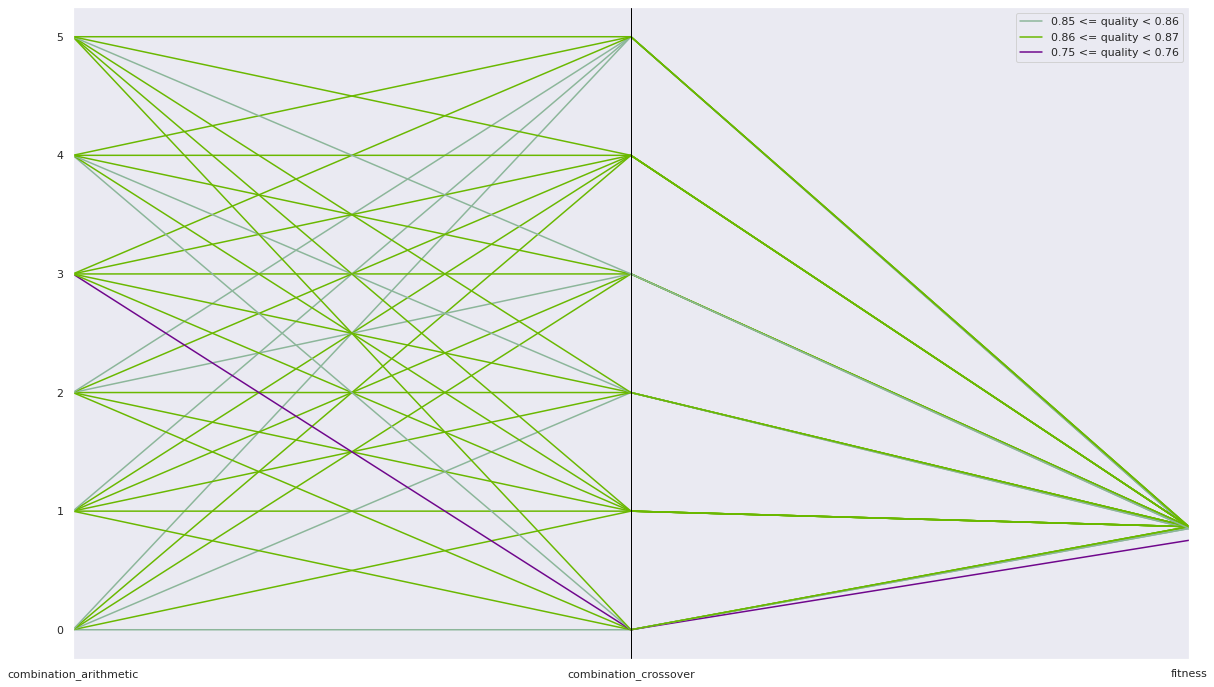

In [33]:
fig = plt.figure(figsize=(20,12))

# 'creep_mutation_mean'
pandas.plotting.parallel_coordinates(
    all_data_last,
    "quality",
    cols=['combination_arithmetic', 'combination_crossover', 'fitness'])
plt.show()

<AxesSubplot:>

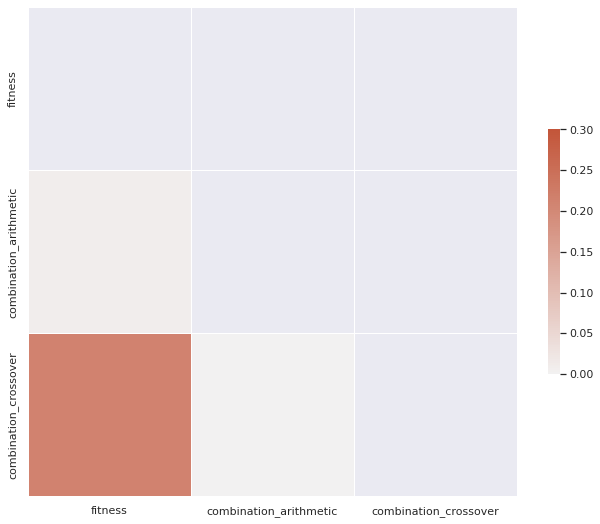

In [31]:
import numpy as np
corr = all_data_last[['fitness','combination_arithmetic', 'combination_crossover']].corr()

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

0.75 <= quality < 0.76
0.85 <= quality < 0.86
0.86 <= quality < 0.87


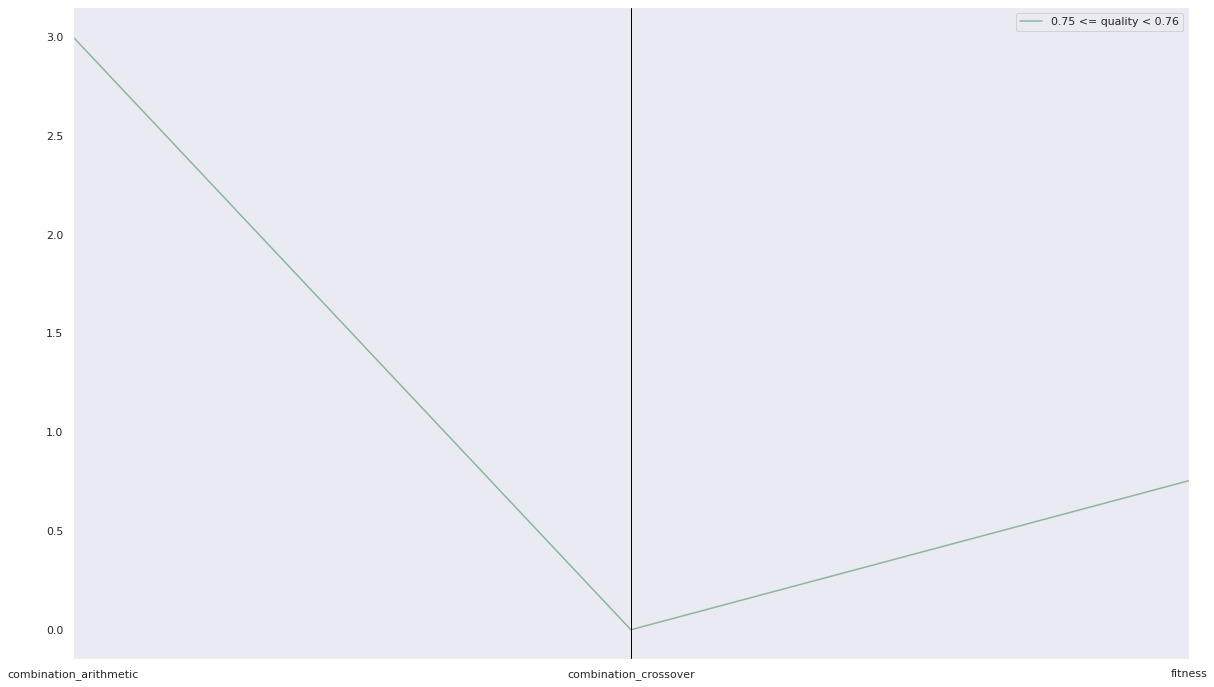

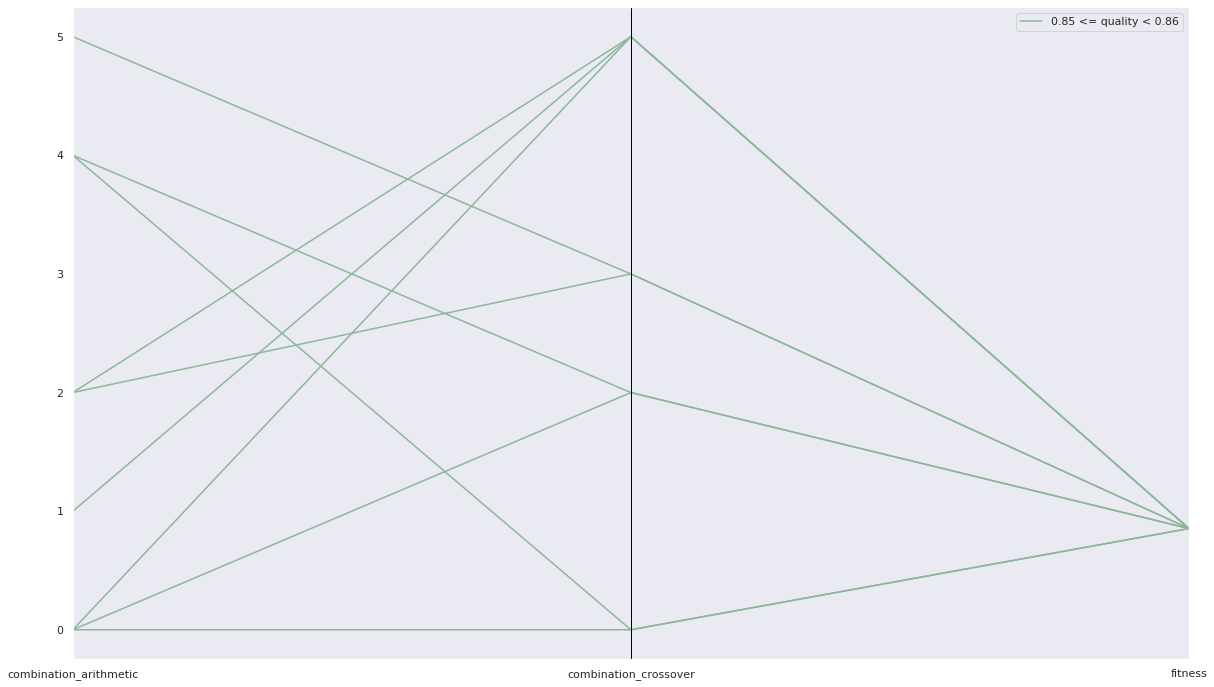

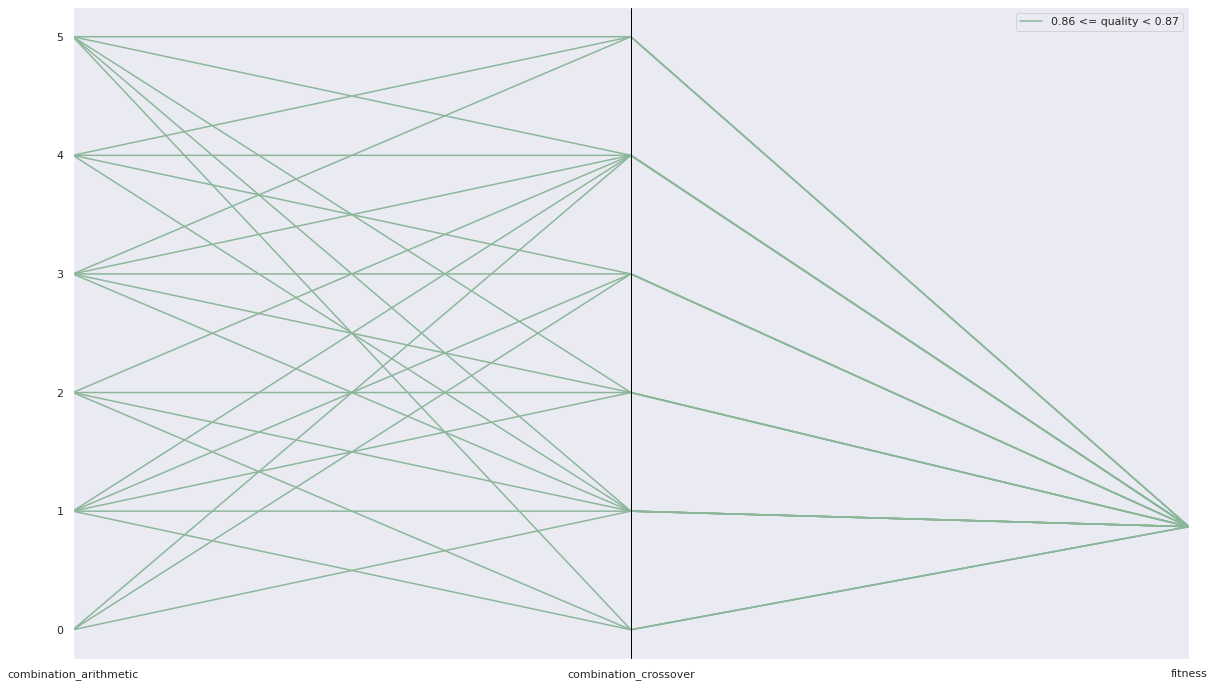

In [34]:
for quality in sorted(all_data_last['quality'].unique()):
    print(quality)
    fig = plt.figure(figsize=(20,12))

    # 'creep_mutation_mean'
    pandas.plotting.parallel_coordinates(
        all_data_last[all_data_last['quality'] == quality],
        "quality",
        cols=['combination_arithmetic', 'combination_crossover', 'fitness'])
    
plt.show()